Start by doing some basic checks – are there any data issues? Does the data need to be cleaned?

Gather some interesting overall insights about the data. For example -- what is the average transaction amount? How many transactions do customers make each month, on average?

Segment the dataset by transaction date and time. Visualise transaction volume and spending over the course of an average day or week. Consider the effect of any outliers that may distort your analysis.

For a challenge – what insights can you draw from the location information provided in the dataset?

In [24]:
import pandas as pd
import dateutil
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [206]:
data=pd.read_excel("ANZ synthesised transaction dataset.xlsx",index_col='date')

### Data issue:

In [207]:
data.isnull().sum()

status                   0
card_present_flag     4326
bpay_biller_code     11158
account                  0
currency                 0
long_lat                 0
txn_description          0
merchant_id           4326
merchant_code        11160
first_name               0
balance                  0
gender                   0
age                      0
merchant_suburb       4326
merchant_state        4326
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
merchant_long_lat     4326
movement                 0
dtype: int64

In [28]:
'''df=pd.get_dummies(data['gender'])
data=pd.concat([data,df], axis=1)
data=data.drop(['gender','merchant_code'],axis=1)'''

"df=pd.get_dummies(data['gender'])\ndata=pd.concat([data,df], axis=1)\ndata=data.drop(['gender','merchant_code'],axis=1)"

In [208]:
df1=data.groupby(['customer_id'], as_index=False)
list(df1)

[('CUS-1005756958',
                  status  card_present_flag bpay_biller_code         account  \
  date                                                                         
  2018-08-02  authorized                1.0              NaN  ACC-2828321672   
  2018-08-02  authorized                1.0              NaN  ACC-2828321672   
  2018-08-03  authorized                1.0              NaN  ACC-2828321672   
  2018-08-03  authorized                0.0              NaN  ACC-2828321672   
  2018-08-03  authorized                1.0              NaN  ACC-2828321672   
  2018-08-04      posted                NaN              NaN  ACC-2828321672   
  2018-08-04  authorized                1.0              NaN  ACC-2828321672   
  2018-08-04  authorized                1.0              NaN  ACC-2828321672   
  2018-08-05  authorized                1.0              NaN  ACC-2828321672   
  2018-08-05  authorized                1.0              NaN  ACC-2828321672   
  2018-08-06  author

In [30]:
#Monthly average amount
data['amount'].resample('M').mean()

date
2018-08-31    185.121867
2018-09-30    182.045903
2018-10-31    196.427323
Freq: M, Name: amount, dtype: float64

In [31]:
#Total monthly transactions
data['customer_id'].resample('M').count()

date
2018-08-31    3943
2018-09-30    4013
2018-10-31    4087
Freq: M, Name: customer_id, dtype: int64

In [32]:
##  Top 10 customers with amount
df1=data.groupby(['customer_id','gender','age', 'balance'], as_index=False).agg({"amount": "sum"})
df1.sort_values(by='amount',ascending=False,inplace=True)
df1.head(10)

,customer_id,gender,age,balance,amount
3218,CUS-1816693151,M,40,85890.29,8835.98
3210,CUS-1816693151,M,40,77054.31,8835.98
3209,CUS-1816693151,M,40,70242.78,8835.98
3180,CUS-1816693151,M,40,62647.22,8835.98
750,CUS-1271030853,F,30,2063.14,7081.09
4631,CUS-2178051368,M,25,10753.02,6107.23
4614,CUS-2178051368,M,25,6111.57,6107.23
10825,CUS-51506836,M,24,17127.02,6024.49
10906,CUS-51506836,M,24,21158.28,6024.49
5261,CUS-2376382098,F,39,24135.54,5103.51


In [51]:
#df1.iplot(kind='bar',title='Total Transaction Amount by Age',x='age',xTitle='Age',y='amount',yTitle='Amount',mode='markers')

In [52]:
#df1.iplot(kind='bar',title='Transaction Amount by Gender',x='gender',xTitle='Gender',y='amount',yTitle='Amount',colors={'blue','red'})

In [35]:
df2=data.groupby(['merchant_suburb'], as_index=False).agg({"amount": "sum"})
df2.sort_values(by='amount',ascending=False,inplace=True)
df2=df2.head(10)
df2

,merchant_suburb,amount
1380,Sydney,21675.44
893,Melbourne,11943.53
1322,South Brisbane,11740.58
880,Mascot,10282.62
978,Mount Gambier,4710.25
855,Malvern,3994.83
870,Maribyrnong,3770.83
1130,Parap,3323.51
196,Brisbane City,2724.45
980,Mount Gravatt,2721.14


In [36]:
df2.iplot(kind='bar',title='Top 10 Merchant location',x='merchant_suburb',xTitle='Merchant location',y='amount', yTitle='Total Transaction Amount')

In [37]:
##  Top 5 customers on locations with  amount
data.groupby(['customer_id','merchant_suburb'])['amount'].count().sort_values(ascending=False).head()

customer_id     merchant_suburb
CUS-2487424745  Southport          42
CUS-2599279756  Castlemaine        33
CUS-2487424745  Broadbeach         26
CUS-2599279756  Mansfield          25
CUS-2142601169  Sydney             25
Name: amount, dtype: int64

In [38]:
#Weekly
W_A=data['amount'].resample('W').mean()
W_A

date
2018-08-05    151.315346
2018-08-12    191.737796
2018-08-19    180.216372
2018-08-26    189.795859
2018-09-02    162.706660
2018-09-09    194.403141
2018-09-16    186.912108
2018-09-23    198.120488
2018-09-30    187.498859
2018-10-07    179.005933
2018-10-14    174.715065
2018-10-21    217.294899
2018-10-28    196.041241
2018-11-04    248.730753
Freq: W-SUN, Name: amount, dtype: float64

In [39]:
W_V=data['amount'].resample('W').count()
W_V

date
2018-08-05    664
2018-08-12    894
2018-08-19    791
2018-08-26    920
2018-09-02    940
2018-09-09    936
2018-09-16    930
2018-09-23    943
2018-09-30    938
2018-10-07    949
2018-10-14    928
2018-10-21    943
2018-10-28    935
2018-11-04    332
Freq: W-SUN, Name: amount, dtype: int64

In [40]:
d={'Amount':W_A, 'Volume':W_V }
df=pd.DataFrame(data=d)
df

,Amount,Volume
date,,
2018-08-05,151.315346,664
2018-08-12,191.737796,894
2018-08-19,180.216372,791
2018-08-26,189.795859,920
2018-09-02,162.706660,940
2018-09-09,194.403141,936
2018-09-16,186.912108,930
2018-09-23,198.120488,943
2018-09-30,187.498859,938


In [54]:
#fig = df.iplot(asFigure=True,title='Weekly Transaction Spending', xTitle='Date', yTitle='Amount & Volume')
#fig.show()

In [3]:
import pandas as pd

In [26]:
data=pd.read_excel("ANZ synthesised transaction dataset.xlsx")

In [27]:
data=data[['customer_id','gender','age','txn_description','balance','amount']]
data.head()

,customer_id,gender,age,txn_description,balance,amount
0,CUS-2487424745,F,26,POS,35.39,16.25
1,CUS-2487424745,F,26,SALES-POS,21.20,14.19
2,CUS-2142601169,M,38,POS,5.71,6.42
3,CUS-1614226872,F,40,SALES-POS,2117.22,40.90
4,CUS-2487424745,F,26,SALES-POS,17.95,3.25


In [28]:
df=pd.get_dummies(data['gender'])
data=pd.concat([data,df], axis=1)

In [29]:
data=data.drop(['gender'],axis=1)

In [32]:
data.head(10)

,customer_id,age,txn_description,balance,amount,F,M
0,CUS-2487424745,26,POS,35.39,16.25,1,0
1,CUS-2487424745,26,SALES-POS,21.20,14.19,1,0
2,CUS-2142601169,38,POS,5.71,6.42,0,1
3,CUS-1614226872,40,SALES-POS,2117.22,40.90,1,0
4,CUS-2487424745,26,SALES-POS,17.95,3.25,1,0
5,CUS-2688605418,20,PAYMENT,1705.43,163.00,0,1
6,CUS-4123612273,43,SALES-POS,1248.36,61.06,1,0
7,CUS-4123612273,43,POS,1232.75,15.61,1,0
8,CUS-3026014945,27,POS,213.16,19.25,1,0
9,CUS-2031327464,40,INTER BANK,466.58,21.00,0,1


In [30]:
data['txn_description'].unique()

array(['POS', 'SALES-POS', 'PAYMENT', 'INTER BANK', 'PAY/SALARY',
       'PHONE BANK'], dtype=object)

In [33]:
data=data[data["txn_description"]=="PAY/SALARY"]
data.head()

,customer_id,age,txn_description,balance,amount,F,M
50,CUS-1462656821,23,PAY/SALARY,8342.11,3903.95,0,1
61,CUS-2500783281,23,PAY/SALARY,2040.58,1626.48,1,0
64,CUS-326006476,22,PAY/SALARY,3158.51,983.36,0,1
68,CUS-1433879684,24,PAY/SALARY,2517.66,1408.08,0,1
70,CUS-4123612273,43,PAY/SALARY,2271.79,1068.04,1,0


In [34]:
data = data.reset_index(drop=True)
data.head()

,customer_id,age,txn_description,balance,amount,F,M
0,CUS-1462656821,23,PAY/SALARY,8342.11,3903.95,0,1
1,CUS-2500783281,23,PAY/SALARY,2040.58,1626.48,1,0
2,CUS-326006476,22,PAY/SALARY,3158.51,983.36,0,1
3,CUS-1433879684,24,PAY/SALARY,2517.66,1408.08,0,1
4,CUS-4123612273,43,PAY/SALARY,2271.79,1068.04,1,0


In [42]:
df2=data.groupby(['customer_id','age','F','M'], as_index=False).agg({"amount": "sum"})

,customer_id,age,F,M,amount
0,CUS-1005756958,53,1,0,12616.11
1,CUS-1117979751,21,0,1,25050.55
2,CUS-1140341822,28,0,1,11499.06
3,CUS-1147642491,34,1,0,22248.07
4,CUS-1196156254,34,1,0,27326.11
5,CUS-1220154422,25,1,0,15976.52
6,CUS-1233833708,44,0,1,7155.96
7,CUS-1271030853,30,1,0,16214.10
8,CUS-127297539,20,1,0,14804.27
9,CUS-134193016,21,1,0,14165.76


In [44]:
df2.rename(columns = {'amount':'Annual_Salary'}, inplace = True)
df2.head()

,customer_id,age,F,M,Annual_Salary
0,CUS-1005756958,53,1,0,12616.11
1,CUS-1117979751,21,0,1,25050.55
2,CUS-1140341822,28,0,1,11499.06
3,CUS-1147642491,34,1,0,22248.07
4,CUS-1196156254,34,1,0,27326.11


In [71]:
df2.corr()

,age,F,M,Annual_Salary
age,1.000000,-0.012067,0.012067,-0.036504
F,-0.012067,1.000000,-1.000000,-0.102226
M,0.012067,-1.000000,1.000000,0.102226
Annual_Salary,-0.036504,-0.102226,0.102226,1.000000


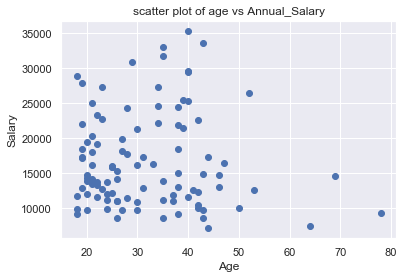

In [109]:
plt.scatter(X['age'], y)
plt.title('scatter plot of age vs Annual_Salary')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Salary', fontsize=12)
plt.show()

In [121]:
X=df2['age']
y=df2['Annual_Salary']

In [123]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X,y, test_size=0.2, random_state=42)

In [124]:
# Creates a linear regression from the data points
m,b = np.polyfit(train_x, train_y, 1)

In [125]:
# This is a simple y = mx + b line function
def f(x):
    return m*x + b

In [134]:
predicted=f(test_x)

In [137]:
from sklearn.metrics import r2_score
r2_score(test_y,predicted)

-0.002239472357304484

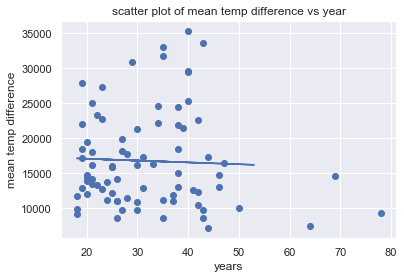

In [135]:
# This generates the same scatter plot as before, but adds a line plot using the function above
plt.scatter(train_x, train_y)

plt.plot(test_x, predicted)

plt.title('scatter plot of mean temp difference vs year')
plt.xlabel('years', fontsize=12)
plt.ylabel('mean temp difference', fontsize=12)
plt.show()

C:\Users\khist\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


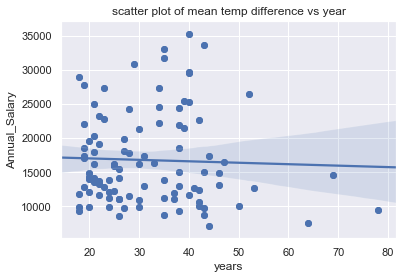

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns; 
sns.set()

plt.scatter(X, y)
plt.title('scatter plot of mean temp difference vs year')
plt.xlabel('years', fontsize=12)
plt.ylabel('mean temp difference', fontsize=12)

#Regression model
sns.regplot(X, y)
plt.show()